### Windfarm Notebook

***

The weather data that we are analysing was downloaded from the Met Eireann website. We have downloaded data from the four corners of the country to see if there is a variation in wind speed based on location. We will analyse the data and see if the wind speed for Ireland is changing over time. Is Ireland getting windier, less windier? 

In [1]:
#Import the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:

#Set the file path
file_path = './data/'
#Load Dublin data first
file_name = 'hly532_dublin_airport_hourly.csv'
file_name3 = 'hly1875_athenry_hourly.csv'
file_name2 = 'hly3904_cork_airport_hourly.csv'
file_name4 = 'hly1475_gurteen_hourly.csv'


df = pd.read_csv(file_path+file_name, skiprows=23, skipinitialspace=True)

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()

#We can see that the data is not in the correct format for analysis. We need to clean the data and convert it to the correct format


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,01-jan-1944 00:00,2,0.0,0,7.2,0,6.7,6.1,9.4,93.0,...,1,19,1,290.0,50,5,0.0,20000.0,12.0,8.0
1,01-jan-1944 01:00,0,0.0,0,7.2,0,6.6,6.1,9.3,91.0,...,1,19,1,280.0,2,2,0.0,30000.0,15.0,7.0
2,01-jan-1944 02:00,2,0.0,0,7.2,0,6.6,6.1,9.3,92.0,...,1,19,1,260.0,50,5,0.0,30000.0,15.0,8.0
3,01-jan-1944 03:00,2,0.0,0,7.2,0,6.5,5.5,9.1,90.0,...,1,19,1,270.0,50,5,0.0,20000.0,15.0,7.0
4,01-jan-1944 04:00,0,0.0,0,7.2,0,6.5,5.5,9.1,89.0,...,1,19,1,270.0,2,2,0.0,30000.0,18.0,7.0


# Clean the dataset

We can see above that the dataset is not in the format we want. We need to clean up the datset before we do any analysis on it.

In [3]:
#First we need to remove the 'Indicator' columns
df = df.drop(columns=['Indicator'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708601 entries, 0 to 708600
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   708601 non-null  object 
 1   Precipitation Amount (mm)         708601 non-null  float64
 2   Temperature (°C)                  708601 non-null  float64
 3   Wet Bulb Temperature (°C)         708601 non-null  float64
 4   Dew Point Temp (°C)               708601 non-null  float64
 5   Vapour Pressure (hPa)             708600 non-null  float64
 6   Relative Humidity (%)             708600 non-null  float64
 7   Mean Sea Level Pressure (hPa)     708601 non-null  float64
 8   Mean Wind Speed (knot)            708601 non-null  int64  
 9   Predominant Wind Direction (deg)  708600 non-null  float64
 10  Present Weather                   708601 non-null  int64  
 11  Past Weather                      708601 non-null  i

Next lets drop any rows that contain na values

In [4]:
#Check for missing values

missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                       0
Precipitation Amount (mm)             0
Temperature (°C)                      0
Wet Bulb Temperature (°C)             0
Dew Point Temp (°C)                   0
Vapour Pressure (hPa)                 1
Relative Humidity (%)                 1
Mean Sea Level Pressure (hPa)         0
Mean Wind Speed (knot)                0
Predominant Wind Direction (deg)      1
Present Weather                       0
Past Weather                          0
Sunshine duration (hours)             0
Visibility                          344
Cloud Height (ft * 100s)             24
Cloud amount                         24
dtype: int64


In [5]:
#Drop the rows with missing values

df.dropna(inplace=True)

#Check for missing values again
missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                     0
Precipitation Amount (mm)           0
Temperature (°C)                    0
Wet Bulb Temperature (°C)           0
Dew Point Temp (°C)                 0
Vapour Pressure (hPa)               0
Relative Humidity (%)               0
Mean Sea Level Pressure (hPa)       0
Mean Wind Speed (knot)              0
Predominant Wind Direction (deg)    0
Present Weather                     0
Past Weather                        0
Sunshine duration (hours)           0
Visibility                          0
Cloud Height (ft * 100s)            0
Cloud amount                        0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708255 entries, 0 to 708600
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   708255 non-null  object 
 1   Precipitation Amount (mm)         708255 non-null  float64
 2   Temperature (°C)                  708255 non-null  float64
 3   Wet Bulb Temperature (°C)         708255 non-null  float64
 4   Dew Point Temp (°C)               708255 non-null  float64
 5   Vapour Pressure (hPa)             708255 non-null  float64
 6   Relative Humidity (%)             708255 non-null  float64
 7   Mean Sea Level Pressure (hPa)     708255 non-null  float64
 8   Mean Wind Speed (knot)            708255 non-null  int64  
 9   Predominant Wind Direction (deg)  708255 non-null  float64
 10  Present Weather                   708255 non-null  int64  
 11  Past Weather                      708255 non-null  int64 

In [7]:
#As we will be analysing the data by month, we need to convert the 'Date/Time (utc)' column to a datetime 

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

#Extract the month from the 'Date/Time (utc)' column
df['Month'] = df['Date/Time (utc)'].dt.month

#Extract the year from the 'Date/Time (utc)' column
df['Year'] = df['Date/Time (utc)'].dt.year


df.head()


0        1944-01-01 00:00:00
1        1944-01-01 01:00:00
2        1944-01-01 02:00:00
3        1944-01-01 03:00:00
4        1944-01-01 04:00:00
                 ...        
708596   2024-10-31 20:00:00
708597   2024-10-31 21:00:00
708598   2024-10-31 22:00:00
708599   2024-10-31 23:00:00
708600   2024-11-01 00:00:00
Name: Date/Time (utc), Length: 708255, dtype: datetime64[ns]


,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Mean Wind Speed (knot),Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount,Month,Year
0,1944-01-01 00:00:00,0.0,7.2,6.7,6.1,9.4,93.0,1027.9,19,290.0,50,5,0.0,20000.0,12.0,8.0,1,1944
1,1944-01-01 01:00:00,0.0,7.2,6.6,6.1,9.3,91.0,1027.6,19,280.0,2,2,0.0,30000.0,15.0,7.0,1,1944
2,1944-01-01 02:00:00,0.0,7.2,6.6,6.1,9.3,92.0,1027.0,19,260.0,50,5,0.0,30000.0,15.0,8.0,1,1944
3,1944-01-01 03:00:00,0.0,7.2,6.5,5.5,9.1,90.0,1026.2,19,270.0,50,5,0.0,20000.0,15.0,7.0,1,1944
4,1944-01-01 04:00:00,0.0,7.2,6.5,5.5,9.1,89.0,1025.5,19,270.0,2,2,0.0,30000.0,18.0,7.0,1,1944


So, what columns are we interested in analysing. Obviously we need to analyse the wind speed column. Will temperature, wind-direction, precipitaion amount etc have any effect on the windspeed. Lets have a quick loot at the correlation between the variables in the dataset, is something standing out?

In [8]:
#Drop columns that are not needed for correlation analysis
correlation_df = df.drop(columns=['Date/Time (utc)', 'Present Weather', 'Past Weather', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount', 'Month', 'Year'])

#Correlate the data to see if there are any relationships between the variables
correlation = correlation_df.corr()


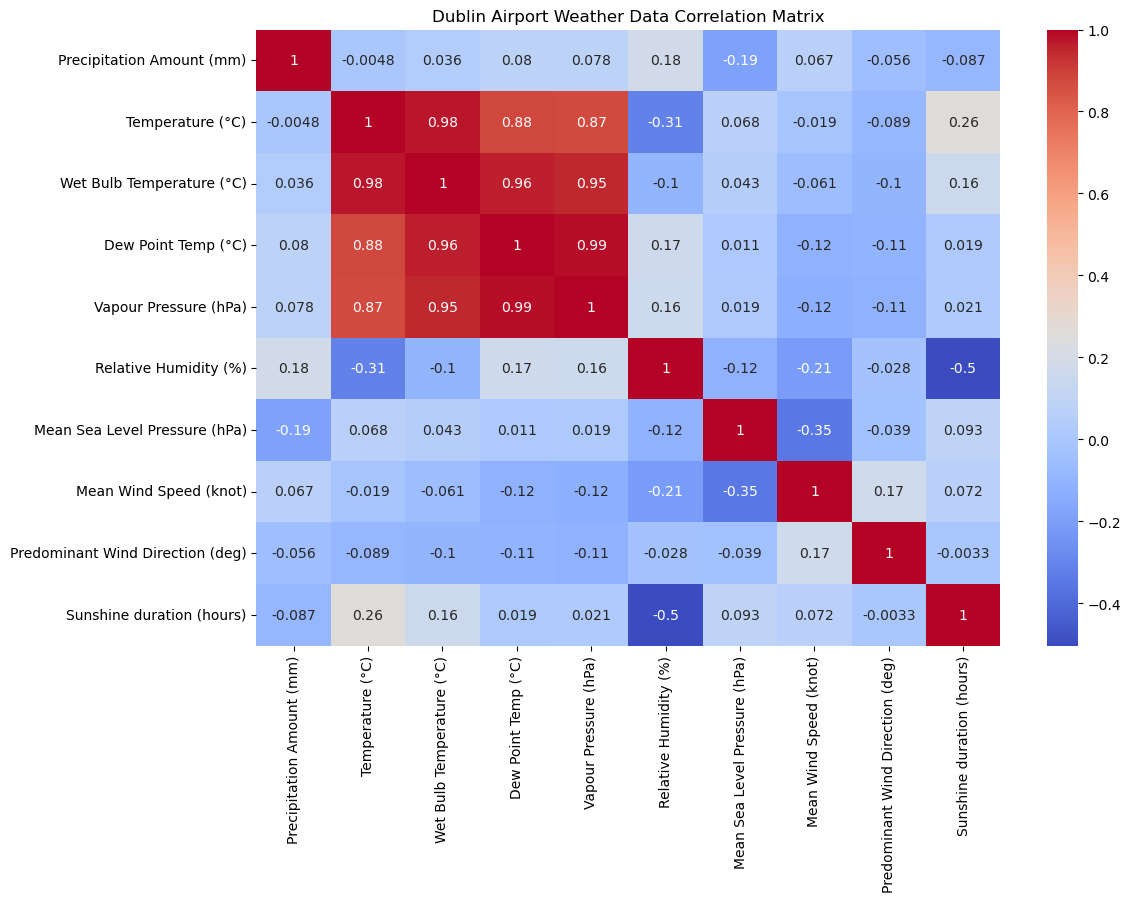

In [9]:
 #Plot the correlation matrix



plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Dublin Airport Weather Data Correlation Matrix')
plt.show()



So there doesn't appear to be any relationship between the other variables and windspeed. We possibly need to write a python script to import the other locations, seeing as we will be repeating all the step above for each location.

In [10]:
#Looking at the above correlation data, there does not appear to be any strong correlations between the variables. 
#The windspeed and temperature have a negative correlation which is expected, but the correlation is weak.

#It looks like we will only be interested in the windspeed column in each of the datasets for our analysis.
dublin_windspeed = df[['Date/Time (utc)', 'Mean Wind Speed (knot)', 'Month', 'Year']].copy()

dublin_windspeed.head()


,Date/Time (utc),Mean Wind Speed (knot),Month,Year
0,1944-01-01 00:00:00,19,1,1944
1,1944-01-01 01:00:00,19,1,1944
2,1944-01-01 02:00:00,19,1,1944
3,1944-01-01 03:00:00,19,1,1944
4,1944-01-01 04:00:00,19,1,1944


In [11]:
# Finally as we will be combining data from multiple datasets, we need to rename the 'Mean Wind Speed (knot)' column to 'Mean Wind Speed (knot) Dublin'

dublin_windspeed.rename(columns={'Mean Wind Speed (knot)': 'Mean Wind Speed (knot) Dublin'}, inplace=True)

dublin_windspeed.head()

,Date/Time (utc),Mean Wind Speed (knot) Dublin,Month,Year
0,1944-01-01 00:00:00,19,1,1944
1,1944-01-01 01:00:00,19,1,1944
2,1944-01-01 02:00:00,19,1,1944
3,1944-01-01 03:00:00,19,1,1944
4,1944-01-01 04:00:00,19,1,1944


Okay, so lets look at repeating the above steps for the other datasets we are interested in using a python class. Lets call an instance of the class to clean each dataset. Lets call our class the `clean_dataset`, and repeat each step above within for each dataset.

In [12]:
#Lets try calling our class and running the functions on the other datasets
#Import the class
from python.clean_dataset import CleanDataset as clean

#Create an instance of the class
athenry_windspeed = clean(file_name2, 23)

#Clean the dataset
athenry_windspeed = athenry_windspeed.clean_dataset()

Dataset imported
Removing NA values
NA values removed
Datetime cleaned
Wind column renamed
         Date/Time (utc)  Mean Wind Speed (knot)_cork  Month  Year
2159 1962-04-01 00:00:00                           12      4  1962
2160 1962-04-01 01:00:00                           12      4  1962
2161 1962-04-01 02:00:00                           13      4  1962
2162 1962-04-01 03:00:00                           13      4  1962
2163 1962-04-01 04:00:00                            5      4  1962
